# End to end examples

## Airfoil

In [1]:
using Pkg;Pkg.activate("D:/JULIA/6_ML_with_Julia/EX-airfoil") ; Pkg.instantiate()

  Activating project at `D:\JULIA\6_ML_with_Julia\EX-airfoil`


> Getting started <br>
> 1. Loading and preparing the data

> DecisionTreeRegressor <br>
> RandomForestRegressor <br>
> Tuning <br>

### Getting started

---

**Data Description**

Airfoil Self-Noise Data Set


**Data Set Information:**

The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.


**Attribute Information:**

This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels.

> https://terms.naver.com/entry.naver?docId=1135946&cid=40942&categoryId=32363

> 에어포일 또는 날개골이라고도 한다. 또한, 헬리콥터의 회전날개와 프로펠러의 깃의 단면도 익형이라고 한다.<br>
> * 비행기의 날개는 기체의 무게를 지지하기 위해 필요한 양력(揚力)을 담당하는 중요한 부분이다. 비행기의 성능은 이 익형의 특성에 의해서 좌우되므로, 그 구조나 강도를 고려하여 설계조건을 가장 만족시킬 수 있는 익형을 채택하는 것이 중요하다.
1903년 미국 라이트형제의 최초의 동력비행기, 1908년 파르망의 부아쟁복엽기, 1900년 도버해협을 횡단한 블레리오단엽기의 익형은 마치 새의 날개 단면과 같이 두께가 얇았다. 제1차 세계대전 중의 유명한 익형은 영국에서 1912년에 개발한 RAF-6과 RAF-15이다. 이 익형들은 많은 날개를 실험한 끝에 산출하여 고안된 익형들이며, 이 때부터 차차 이론연구가 시작되어 우수한 익형이 제작되었다. 이 때의 대표적인 익형으로는 독일의 괴팅겐대학에서 제작한 괴팅겐-387(1919)과 미국 클라크의 클라크 Y(22)가 유명하며, 1924년 뭉크의 M-6, M-12와 영국의 크로워드가 새로이 개발한 RAF익형은 얇은 날개이론을 응용한 설계이다. <br>
>  * 각국의 연구 중에서 특히 1930년경 미국 항공자문위원회(NACA:NASA의 전신)에서 개발한 NACA 4자리 번호 익형은 조직적으로 시작한 일련의 연구이며, 이 때 이후의 익형연구의 주류를 이루었다. 이 익형에 이어서 5자리 번호 익형과 층류익형(層流翼型) 1시리즈, 6시리즈, 7시리즈 등이 탄생하였다. 현재도 비교적 저속 때의 익형은 NACA 익형이 사용되며, 고아음속용(高亞音速用) 익형에서는 날개면 위의 충격파에 의한 기류의 표면이탈을 가급적 지연시키는 것이 요구된다.<br>
대표적인 것은 풍압분포가 익현(翼弦)의 대부분에서 같게 하는 루프톱익형과 날개 앞가장자리 가까이에서 최저압력이 되게 하는 피키(peaky)익형 등이 있다.<br>
>  * 그러나 천음속용에는 익형 자체보다는 날개의 평면형에 관한 연구가 중요한데, 예를 들면 날개에 후퇴각(後退角)을 붙여서 조파실속(造波失速)을 방지하여 저항을 줄이거나 또는 삼각형 날개로 평면을 개량하는 수법을 쓰고 있다. 초음속이 되면 익형은 얇은 것이 양호하며, 후퇴익과 삼각익의 평면을 합쳐서 앞가장자리가 예리한 익형 ·렌즈형 ·쐐기형 ·다이아몬드형 익형 등이 사용된다. [네이버 지식백과] 익형 [airfoil, 翼型] (두산백과 두피디아, 두산백과)

### Loading and preparing the data

In [2]:
using MLJ
using PrettyPrinting
import DataFrames
import Statistics
using CSV
using PyPlot
using HTTP
using StableRNGs

In [3]:
req = HTTP.get("https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/master/Airfoil%20Dataset/airfoil_self_noise.dat");

df = CSV.read(req.body, 
              DataFrames.DataFrame;
              header = ["Frequency", "Attack_Angle", "Chord+Length", "Free_Velocity", "Suction_Side", "Scaled_Sound"]);

df[1:5, :] |> pretty

┌───────────┬──────────────┬──────────────┬───────────────┬──────────────┬──────────────┐
│ Frequency │ Attack_Angle │ Chord+Length │ Free_Velocity │ Suction_Side │ Scaled_Sound │
│ Int64     │ Float64      │ Float64      │ Float64       │ Float64      │ Float64      │
│ Count     │ Continuous   │ Continuous   │ Continuous    │ Continuous   │ Continuous   │
├───────────┼──────────────┼──────────────┼───────────────┼──────────────┼──────────────┤
│ 800.0     │ 0.0          │ 0.3048       │ 71.3          │ 0.00266337   │ 126.201      │
│ 1000.0    │ 0.0          │ 0.3048       │ 71.3          │ 0.00266337   │ 125.201      │
│ 1250.0    │ 0.0          │ 0.3048       │ 71.3          │ 0.00266337   │ 125.951      │
│ 1600.0    │ 0.0          │ 0.3048       │ 71.3          │ 0.00266337   │ 127.591      │
│ 2000.0    │ 0.0          │ 0.3048       │ 71.3          │ 0.00266337   │ 127.461      │
└───────────┴──────────────┴──────────────┴───────────────┴──────────────┴──────────────┘


inspect the schema:

unpack into the data and labels:

In [4]:
y, X = unpack(df, ==(:Scaled_Sound));

Now we Standardize the features using the transformer Standardizer()

In [5]:
X = MLJ.transform(fit!(machine(Standardizer(), X)), X)

┌ Info: Training Machine{Standardizer,…}.
└ @ MLJBase C:\Users\jeffr\.julia\packages\MLJBase\MuLnJ\src\machines.jl:464


,Frequency,Attack_Angle,Chord+Length,Free_Velocity,Suction_Side
,Int64,Float64,Float64,Float64,Float64
1,800,-1.14602,1.7987,1.3125,-0.64459
2,1000,-1.14602,1.7987,1.3125,-0.64459
3,1250,-1.14602,1.7987,1.3125,-0.64459
4,1600,-1.14602,1.7987,1.3125,-0.64459
5,2000,-1.14602,1.7987,1.3125,-0.64459
6,2500,-1.14602,1.7987,1.3125,-0.64459
7,3150,-1.14602,1.7987,1.3125,-0.64459
8,4000,-1.14602,1.7987,1.3125,-0.64459
9,5000,-1.14602,1.7987,1.3125,-0.64459


Partition into train and test set

In [6]:
train, test = partition(collect(eachindex(y)), 0.7, shuffle = true, rng = StableRNG(612));

Let's first see which models are compatible with the scientific type and machine type of our data

In [7]:
for model in models(matching(X, y))
    print("Model Name: ", model.name, " , Package: ", model.package_name, "\n")
end

Model Name: ConstantRegressor , Package: MLJModels
Model Name: DecisionTreeRegressor , Package: BetaML
Model Name: DecisionTreeRegressor , Package: DecisionTree
Model Name: DeterministicConstantRegressor , Package: MLJModels
Model Name: RandomForestRegressor , Package: BetaML
Model Name: RandomForestRegressor , Package: DecisionTree
Model Name: RandomForestRegressor , Package: ScikitLearn


In [8]:
schema(X)

┌───────────────┬────────────┬─────────┐
│ names         │ scitypes   │ types   │
├───────────────┼────────────┼─────────┤
│ Frequency     │ Count      │ Int64   │
│ Attack_Angle  │ Continuous │ Float64 │
│ Chord+Length  │ Continuous │ Float64 │
│ Free_Velocity │ Continuous │ Float64 │
│ Suction_Side  │ Continuous │ Float64 │
└───────────────┴────────────┴─────────┘


Note that if we coerce `X.Frequency` to `Continuous`, many more models are available:

In [9]:
coerce!(X, :Frequency => Continuous)
schema(X)

┌───────────────┬────────────┬─────────┐
│ names         │ scitypes   │ types   │
├───────────────┼────────────┼─────────┤
│ Frequency     │ Continuous │ Float64 │
│ Attack_Angle  │ Continuous │ Float64 │
│ Chord+Length  │ Continuous │ Float64 │
│ Free_Velocity │ Continuous │ Float64 │
│ Suction_Side  │ Continuous │ Float64 │
└───────────────┴────────────┴─────────┘


In [10]:
for model in models(matching(X, y))
    print("Model Name: ", model.name, " , Package: ", model.package_name, "\n")
end

Model Name: ARDRegressor , Package: ScikitLearn
Model Name: AdaBoostRegressor , Package: ScikitLearn
Model Name: BaggingRegressor , Package: ScikitLearn
Model Name: BayesianRidgeRegressor , Package: ScikitLearn
Model Name: ConstantRegressor , Package: MLJModels
Model Name: DecisionTreeRegressor , Package: BetaML
Model Name: DecisionTreeRegressor , Package: DecisionTree
Model Name: DeterministicConstantRegressor , Package: MLJModels
Model Name: DummyRegressor , Package: ScikitLearn
Model Name: ElasticNetCVRegressor , Package: ScikitLearn
Model Name: ElasticNetRegressor , Package: MLJLinearModels
Model Name: ElasticNetRegressor , Package: ScikitLearn
Model Name: EpsilonSVR , Package: LIBSVM
Model Name: EvoTreeGaussian , Package: EvoTrees
Model Name: EvoTreeRegressor , Package: EvoTrees
Model Name: ExtraTreesRegressor , Package: ScikitLearn
Model Name: GaussianProcessRegressor , Package: ScikitLearn
Model Name: GradientBoostingRegressor , Package: ScikitLearn
Model Name: HuberRegressor , 

### DecisionTreeRegressor

---

We will first try out DecisionTreeRegressor:

In [13]:
DecisionTreeRegressor = @load DecisionTreeRegressor pkg=DecisionTree

dcrm = machine(DecisionTreeRegressor(), X, y)

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\jeffr\.julia\packages\MLJModels\tMgLW\src\loading.jl:168


import MLJDecisionTreeInterface ✔


Machine{DecisionTreeRegressor,…} trained 0 times; caches data
  model: MLJDecisionTreeInterface.DecisionTreeRegressor
  args: 
    1:	Source @093 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @314 ⏎ `AbstractVector{Continuous}`


In [14]:
fit!(dcrm, rows = train)
pred_dcrm = predict(dcrm, rows = test);

┌ Info: Training Machine{DecisionTreeRegressor,…}.
└ @ MLJBase C:\Users\jeffr\.julia\packages\MLJBase\MuLnJ\src\machines.jl:464


Now you can call a loss function to assess the performance on test set.

In [15]:
rms(pred_dcrm, y[test])

2.917782781941708

### RandomForestRegressor

---

Now let's try out RandomForestRegressor:

In [16]:
RandomForestRegressor = @load RandomForestRegressor pkg = DecisionTree

rfr = RandomForestRegressor()

rfr_m = machine(rfr, X, y);

import MLJDecisionTreeInterface ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\jeffr\.julia\packages\MLJModels\tMgLW\src\loading.jl:168


Train on the rows corresponding to train

In [17]:
fit!(rfr_m, rows = train);

┌ Info: Training Machine{RandomForestRegressor,…}.
└ @ MLJBase C:\Users\jeffr\.julia\packages\MLJBase\MuLnJ\src\machines.jl:464


predict values on the rows corresponding to test

In [19]:
pred_rfr = predict(rfr_m, rows = test)
rms(pred_rfr, y[test])

2.3015726228201645

Unsuprisingly, the RandomForestRegressor does a better job.

Can we do even better? Yeah, we can!! We can make use of Model Tuning.

### Tuning 

---

In case you are new to model tuning using MLJ, refer lab5 and model-tuning.

Range of values for parameters should be specified to do hyperparameter tuning

In [20]:
r_maxD = range(rfr, :n_trees, lower=9, upper=15)
r_samF = range(rfr, :sampling_fraction, lower=0.6, upper=0.8)
r = [r_maxD, r_samF]

2-element Vector{MLJBase.NumericRange{T, MLJBase.Bounded, Symbol} where T}:
 NumericRange(9 ≤ n_trees ≤ 15; origin=12.0, unit=3.0)
 NumericRange(0.6 ≤ sampling_fraction ≤ 0.8; origin=0.7, unit=0.10000000000000003)

Now we specify how the tunig should be done. Let's just specify a coarse grid tuning with cross validation and instantiate a tuned model:

In [22]:
tuning = Grid(resolution = 7)
resampling = CV(nfolds = 6)

tm = TunedModel(model = rfr, 
                tuning = tuning,
                resampling = resampling, 
                ranges = r, 
                measure = rms)

rfr_tm = machine(tm, X, y);

train on the rows corresponding to train

In [23]:
fit!(rfr_tm, rows = train);

┌ Info: Training Machine{DeterministicTunedModel{Grid,…},…}.
└ @ MLJBase C:\Users\jeffr\.julia\packages\MLJBase\MuLnJ\src\machines.jl:464
┌ Info: Attempting to evaluate 49 models.
└ @ MLJTuning C:\Users\jeffr\.julia\packages\MLJTuning\Al9yX\src\tuned_models.jl:680
Evaluating over 49 metamodels: 100%[=========================] Time: 0:00:03


predict values on the rows corresponding to test

In [24]:
pred_rfr_tm = predict(rfr_tm, rows = test);
rms(pred_rfr_tm, y[test])

2.2932573402789718

That was great! We have further improved the accuracy

Now to retreive best model, You can use

In [25]:
fitted_params(rfr_tm).bes

RandomForestRegressor(
    max_depth = -1,
    min_samples_leaf = 1,
    min_samples_split = 2,
    min_purity_increase = 0.0,
    n_subfeatures = -1,
    n_trees = 14,
    sampling_fraction = 0.8,
    pdf_smoothing = 0.0,
    rng = Random._GLOBAL_RNG())

Now we can investigate the tuning by using report. Let's plot a heatmap of the measurements:

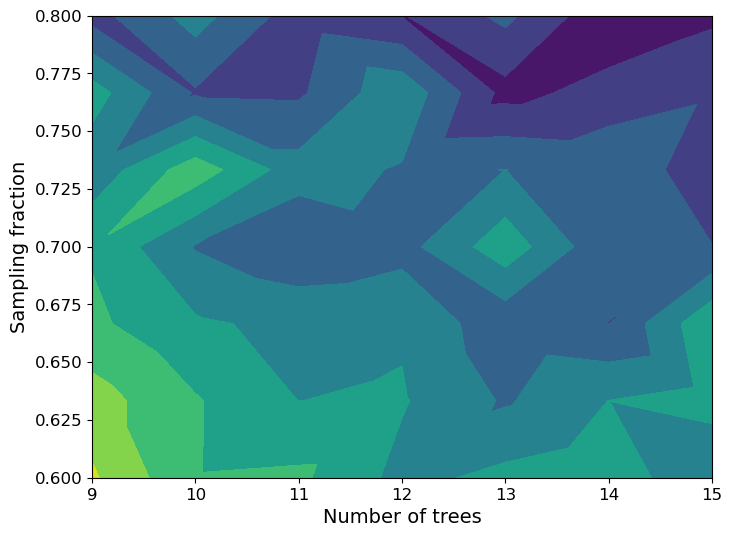

In [27]:
r = report(rfr_tm)
res = r.plotting

md = res.parameter_values[:, 1]
mcw = res.parameter_values[:, 2]

figure(figsize = (8, 6))
tricontourf(md, mcw, res.measurements)

xlabel("Number of trees", fontsize = 14)
ylabel("Sampling fraction", fontsize = 14)
xticks(9:1:15, fontsize = 12)
yticks(fontsize = 12)

savefig("./plots/4.7.1.png")